In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [8]:
data=pd.read_csv("C:\\Users\\Mega Store\\Documents\\jupyter\\task 3\\bank-additional-full.csv",delimiter=';')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
data.duplicated().sum()

12

In [11]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [12]:
# Preprocessing the Data using LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode each of the categorical columns
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])


In [13]:
# Split the Data into Features and Target Variable
X = data.drop('y', axis=1)  # X is the feature set (drop the target column 'y')
y = data['y']               # y is the target (0 or 1 for 'no'/'yes')


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Build the Decision Tree Classifier
my_decision_tree = DecisionTreeClassifier(random_state=42)
my_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predict on Test Set
y_pred = my_decision_tree.predict(X_test)

In [28]:
# Evaluate the Model : 
# calculate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8828624625597021


In [27]:
# Evaluate the Model : 
# calculate the Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     10929
           1       0.49      0.50      0.49      1424

    accuracy                           0.88     12353
   macro avg       0.71      0.72      0.71     12353
weighted avg       0.88      0.88      0.88     12353



In [25]:
# calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[10198,   731],
       [  716,   708]], dtype=int64)

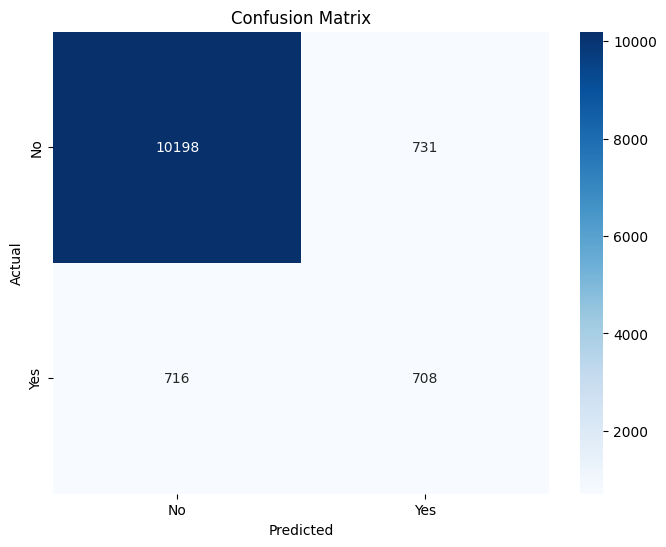

In [26]:
#Plot the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

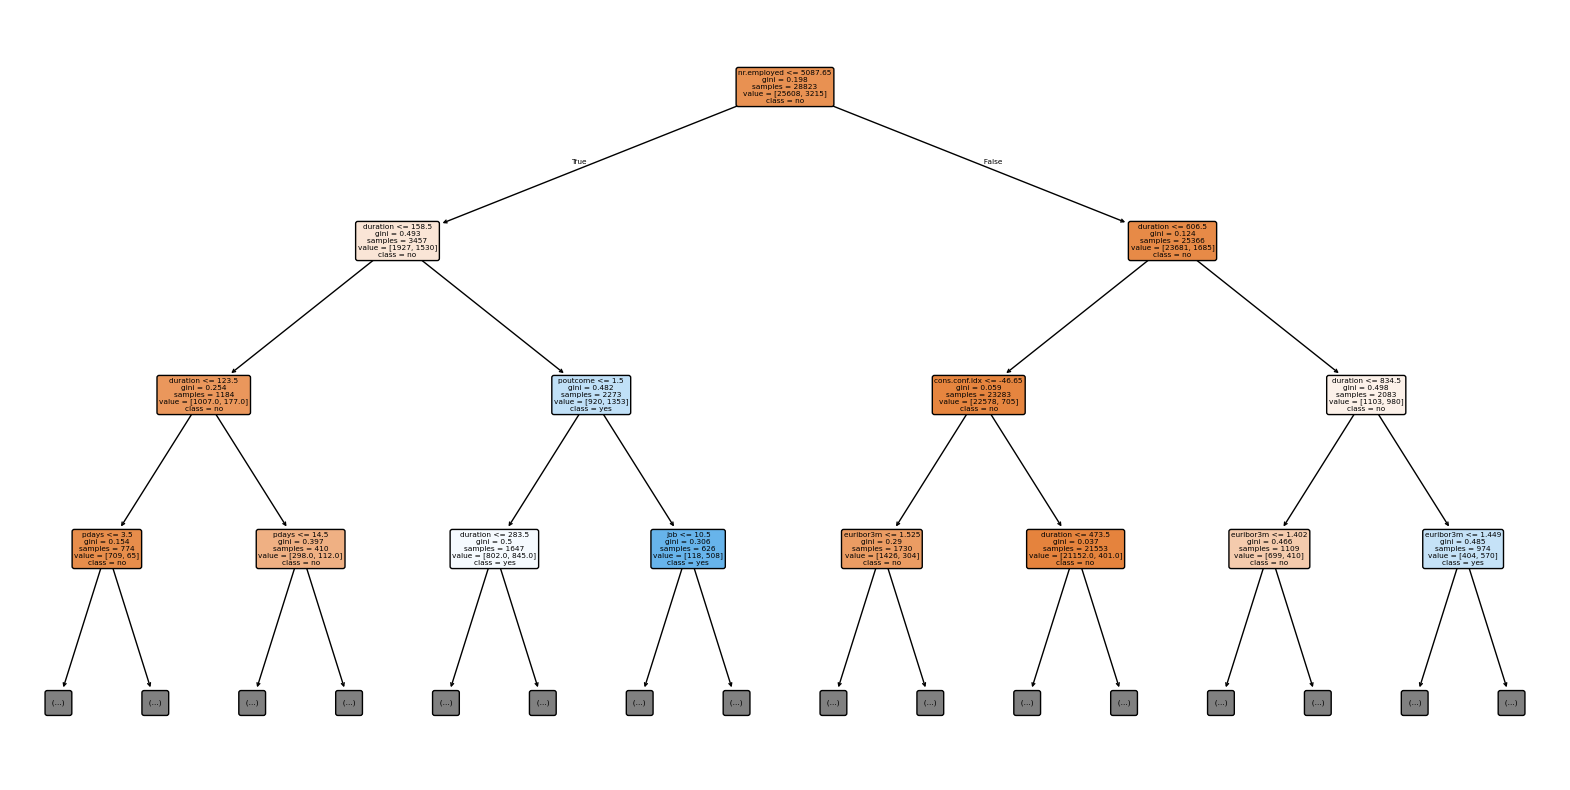

In [23]:
# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(my_decision_tree, 
        feature_names=X.columns, 
        class_names=['no', 'yes'], 
        filled=True, 
        rounded=True,
        max_depth=3)  # Reduce depth for faster plotting

plt.show()
